In [5]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate frequency using Quinn and Fernandes algorithm
def freq(x, n, xm, FreqTOL):
    z = np.zeros(n)
    alpha = 0.0
    beta = 2.0
    z[0] = x[0] - xm[0]
    while abs(alpha - beta) > FreqTOL:
        alpha = beta
        z[1] = x[1] - xm[1] + alpha * z[0]
        num = z[0] * z[1]
        den = z[0] * z[0]
        for i in range(2, n):
            z[i] = x[i] - xm[i] + alpha * z[i - 1] - z[i - 2]
            num += z[i - 1] * (z[i] + z[i - 2])
            den += z[i - 1] * z[i - 1]
        beta = num / den
    w = np.arccos(beta / 2.0)
    return w

# Function to fit trigonometric series using least squares
def trig_fit(x, n, w, xm):
    Sc = 0.0
    Ss = 0.0
    Scc = 0.0
    Sss = 0.0
    Scs = 0.0
    Sx = 0.0
    Sxc = 0.0
    Sxs = 0.0
    for i in range(n):
        c = np.cos(w * i)
        s = np.sin(w * i)
        dx = x[i] - xm[i]
        Sc += c
        Ss += s
        Scc += c * c
        Sss += s * s
        Scs += c * s
        Sx += dx
        Sxc += dx * c
        Sxs += dx * s
    Sc /= n
    Ss /= n
    Scc /= n
    Sss /= n
    Scs /= n
    Sx /= n
    Sxc /= n
    Sxs /= n
    if w == 0.0:
        m = Sx
        a = 0.0
        b = 0.0
    else:
        den = (Scs - Sc * Ss) ** 2 - (Scc - Sc ** 2) * (Sss - Ss ** 2)
        a = ((Sxs - Sx * Ss) * (Scs - Sc * Ss) - (Sxc - Sx * Sc) * (Sss - Ss ** 2)) / den
        b = ((Sxc - Sx * Sc) * (Scs - Sc * Ss) - (Sxs - Sx * Ss) * (Scc - Sc ** 2)) / den
        m = Sx - a * Sc - b * Ss
    return m, a, b

# Main function to calculate future and past modeled prices
def calculate_future_and_past(open_prices, Npast, Nfut, Nharm, FreqTOL):
    N = max(Npast, Nfut + 1)
    xm = np.empty(N)
    ym = np.empty(N)
    # Prepare input data
    av = np.mean(open_prices[:Npast])
    # Initialize model outputs
    xm.fill(av)
    ym.fill(av)
    # Fit trigonometric model and calculate predictions
    n = min(len(open_prices), Npast)
    for harm in range(1, Nharm + 1):
        w = freq(open_prices[:n], n, xm, FreqTOL)
        m, a, b = trig_fit(open_prices[:n], n, w, xm)
        for i in range(N):
            xm[i] += m + a * np.cos(w * (n + i)) + b * np.sin(w * (n + i))
            if i <= Nfut:
                ym[Nfut - i] += m + a * np.cos(w * (n + i)) - b * np.sin(w * (n + i))
    return ym[Nfut:], ym[:Nfut]

# Fetch AAPL stock data from Yahoo Finance
stock_data = yf.download("AAPL", start="2019-01-01", end="2020-01-01")
open_prices = stock_data["Open"].values

# Parameters for Fourier Extrapolator
Npast = 300
Nfut = 50
Nharm = 20
FreqTOL = 0.00001

# Calculate future and past modeled prices
future_prices, past_prices = calculate_future_and_past(open_prices, Npast, Nfut, Nharm, FreqTOL)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, open_prices, label="Original Prices", color="blue")
plt.plot(stock_data.index[:Nfut], past_prices[::-1], label="Historical FFT Line", color="green")
plt.plot(stock_data.index[Npast:Npast+len(future_prices)], future_prices, label="Predicted FFT Line", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("AAPL Stock Price with FFT Prediction")
plt.legend()
plt.grid(True)
plt.show()


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18

C:\Users\p3749\AppData\Local\Temp\ipykernel_18716\3842201747.py:24: RuntimeWarning: invalid value encountered in arccos
  w = np.arccos(beta / 2.0)



19
20
Npast: 300
Length of future_prices array: 250
Length of stock_data.index slice: 454


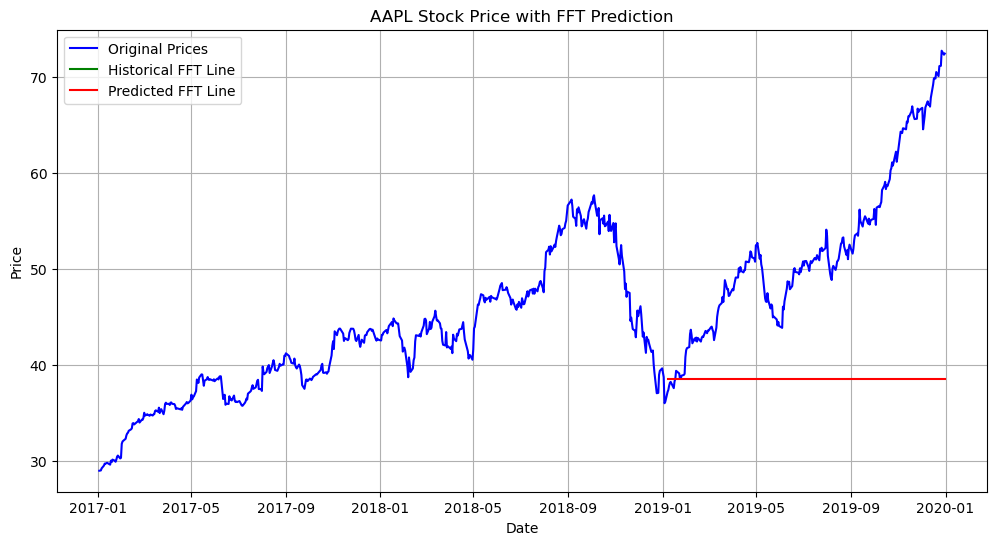

In [9]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Function to calculate frequency using Quinn and Fernandes algorithm
def freq(x, n, xm, FreqTOL):
    z = np.zeros(n)
    alpha = 0.0
    beta = 2.0
    z[0] = x[0] - xm[0]
    max_iterations = 1000  # Set a maximum number of iterations
    num_iterations = 0
    while abs(alpha - beta) > FreqTOL and num_iterations < max_iterations:
        alpha = beta
        z[1] = x[1] - xm[1] + alpha * z[0]
        num = z[0] * z[1]
        den = z[0] * z[0]
        for i in range(2, n):
            z[i] = x[i] - xm[i] + alpha * z[i - 1] - z[i - 2]
            num += z[i - 1] * (z[i] + z[i - 2])
            den += z[i - 1] * z[i - 1]
        beta = num / den
        num_iterations += 1
    w = np.arccos(beta / 2.0)
    return w


# Function to fit trigonometric series using least squares
def trig_fit(x, n, w, xm):
    Sc = 0.0
    Ss = 0.0
    Scc = 0.0
    Sss = 0.0
    Scs = 0.0
    Sx = 0.0
    Sxc = 0.0
    Sxs = 0.0
    for i in range(n):
        c = np.cos(w * i)
        s = np.sin(w * i)
        dx = x[i] - xm[i]
        Sc += c
        Ss += s
        Scc += c * c
        Sss += s * s
        Scs += c * s
        Sx += dx
        Sxc += dx * c
        Sxs += dx * s
    Sc /= n
    Ss /= n
    Scc /= n
    Sss /= n
    Scs /= n
    Sx /= n
    Sxc /= n
    Sxs /= n
    if w == 0.0:
        m = Sx
        a = 0.0
        b = 0.0
    else:
        den = (Scs - Sc * Ss) ** 2 - (Scc - Sc ** 2) * (Sss - Ss ** 2)
        a = ((Sxs - Sx * Ss) * (Scs - Sc * Ss) - (Sxc - Sx * Sc) * (Sss - Ss ** 2)) / den
        b = ((Sxc - Sx * Sc) * (Scs - Sc * Ss) - (Sxs - Sx * Ss) * (Scc - Sc ** 2)) / den
        m = Sx - a * Sc - b * Ss
    return m, a, b

# Main function to calculate future and past modeled prices
def calculate_future_and_past(open_prices, Npast, Nfut, Nharm, FreqTOL):
    N = max(Npast, Nfut + 1)
    xm = np.empty(N)
    ym = np.empty(N)
    # Prepare input data
    av = np.mean(open_prices[:Npast])
    # Initialize model outputs
    xm.fill(av)
    ym.fill(av)
    # Fit trigonometric model and calculate predictions
    n = min(len(open_prices), Npast)
    for harm in range(1, Nharm + 1):
        w = freq(open_prices[:n], n, xm, FreqTOL)
        m, a, b = trig_fit(open_prices[:n], n, w, xm)
        for i in range(N):
            xm[i] += m + a * np.cos(w * (n + i)) + b * np.sin(w * (n + i))
            if i <= Nfut:
                ym[Nfut - i] += m + a * np.cos(w * (n + i)) - b * np.sin(w * (n + i))
        print(harm)
    return ym[Nfut:], ym[:Nfut]

# Fetch AAPL stock data from Yahoo Finance
stock_data = yf.download("AAPL", start="2017-01-01", end="2020-01-01")
open_prices = stock_data["Open"].values

# Parameters for Fourier Extrapolator
Npast = 300
Nfut = 50
Nharm = 20
FreqTOL = 0.00001

# Calculate future and past modeled prices
future_prices, past_prices = calculate_future_and_past(open_prices, Npast, Nfut, Nharm, FreqTOL)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, open_prices, label="Original Prices", color="blue")
plt.plot(stock_data.index[:Nfut], past_prices[::-1], label="Historical FFT Line", color="green")
# plt.plot(stock_data.index[Npast:Npast+len(future_prices)], future_prices, label="Predicted FFT Line", color="red")
# plt.plot(stock_data.index[Npast:Npast+len(future_prices)], future_prices, label="Predicted FFT Line", color="red")
# print("Length of stock_data.index slice:", len(stock_data.index[Npast:Npast+len(future_prices)]))
# print("Length of future_prices array:", len(future_prices))
# # plt.plot(stock_data.index[Npast:Npast+len(future_prices)], future_prices, label="Predicted FFT Line", color="red")
# plt.plot(stock_data.index[Npast:Npast+len(future_prices)], future_prices, label="Predicted FFT Line", color="red")
print("Npast:", Npast)
print("Length of future_prices array:", len(future_prices))
print("Length of stock_data.index slice:", len(stock_data.index[Npast:]))
# plt.plot(stock_data.index[Npast:], future_prices, label="Predicted FFT Line", color="red")
plt.plot(stock_data.index[-len(future_prices):], future_prices, label="Predicted FFT Line", color="red")

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("AAPL Stock Price with FFT Prediction")
plt.legend()
plt.grid(True)
plt.show()
